Use Openrouter API for gemma2 to compare with kaggle_outputs

In [1]:
from pathlib import Path
import os

print("Changing scope to parent dir")
scope = Path().resolve()
print(f"Current Scope {scope}")

os.chdir("..")

scope = Path().resolve()
print(f"New Scope {scope}")

Changing scope to parent dir
Current Scope /mnt/c/Users/ankit/Desktop/Portfolio/kaggle/drawing-wit-llms/dataset
New Scope /mnt/c/Users/ankit/Desktop/Portfolio/kaggle/drawing-wit-llms


In [2]:
from dotenv import load_dotenv
from utils.llm import llm

load_dotenv(".env")

gemma = llm(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY"),
    model="google/gemma-2-9b-it:free",
    req_per_day= 10000 # no limit
)

In [3]:
import pandas as pd

df = pd.read_csv("dataset/train.csv")

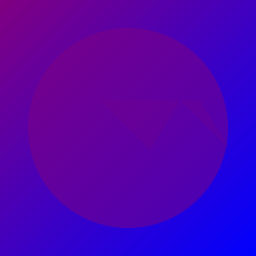

a purple forest at dusk


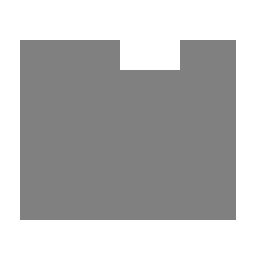

gray wool coat with a faux fur collar


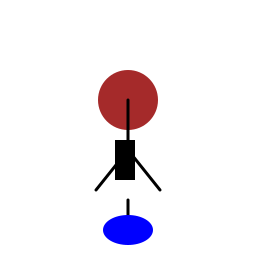

a lighthouse overlooking the ocean


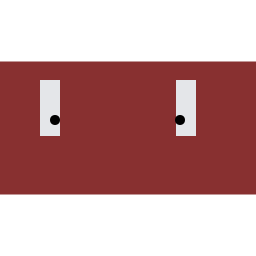

burgundy corduroy pants with patch pockets and silver buttons


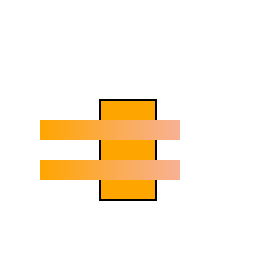

orange corduroy overalls


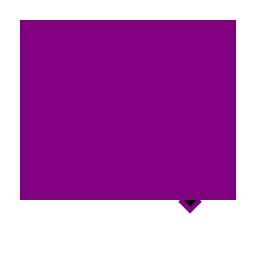

a purple silk scarf with tassel trim


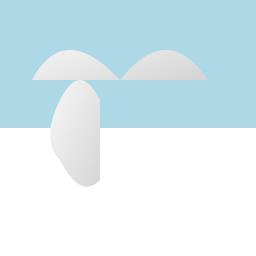

a green lagoon under a cloudy sky


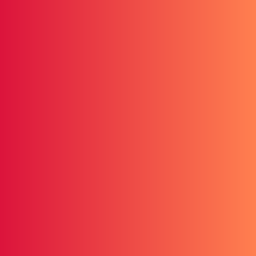

crimson rectangles forming a chaotic grid


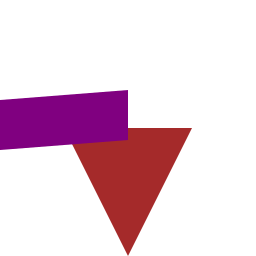

purple pyramids spiraling around a bronze cone


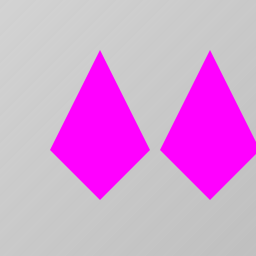

magenta trapezoids layered on a transluscent silver sheet


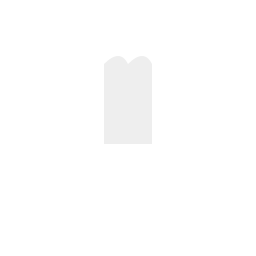

a snowy plain


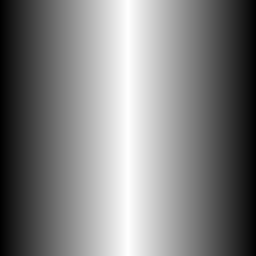

black and white checkered pants


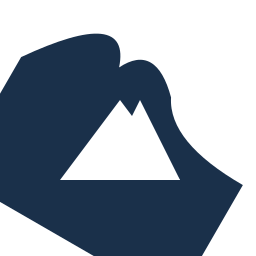

a starlit night over snow-covered peaks


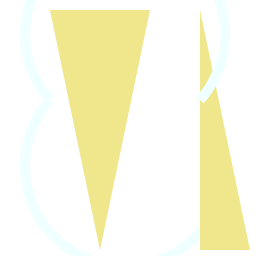

khaki triangles and azure crescents


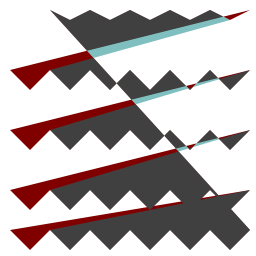

a maroon dodecahedron interwoven with teal threads


In [4]:
from IPython.display import SVG
from utils.constants import SVG_PROMPT, DEFAULT_SVG
import re

for idx, row in df.iterrows():
    desc  = row["description"]
    response = gemma(SVG_PROMPT.format(desc))
    if response:
        matches = re.findall(r"<svg.*?</svg>", response, re.DOTALL | re.IGNORECASE)
    else:
        matches = None
    if matches:
        svg = matches[-1]
    else: 
        svg = DEFAULT_SVG
    display(SVG(svg))
    print(desc)

# Conclusion 
Cannot use api as the quantization setting varies from the kaggle config. Therefore, cannot be used to replicate.